# Support Vector Machine

### 1. Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Pharma_Industry (1).csv')
df.head()

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
0,-0.128538,0.303280,-1.881849,0.258286,-0.792011,1
1,-1.846188,2.865142,-0.929511,2.866786,-0.719447,1
2,-1.252393,-1.541613,0.363632,-0.325370,0.191314,0
3,1.992515,-1.142779,-0.766657,0.975286,-0.823355,1
4,0.377100,0.538410,-0.029263,1.896015,-0.960130,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Drug Dosage (mg)                500 non-null    float64
 1   Systolic Blood Pressure (mmHg)  500 non-null    float64
 2   Heart Rate (BPM)                500 non-null    float64
 3   Liver Toxicity Index (U/L)      500 non-null    float64
 4   Blood Glucose Level (mg/dL)     500 non-null    float64
 5   Drug Response                   500 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 23.6 KB


In [4]:
df.describe()

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.0000
mean,-0.037761,0.214957,0.062871,0.054398,-0.171863,0.5200
std,0.979891,1.247567,0.971978,0.986001,0.983765,0.5001
min,-3.019512,-3.773897,-2.940389,-3.401277,-3.110431,0.0000
25%,-0.642003,-0.565168,-0.648157,-0.586085,-0.797715,0.0000
50%,-0.019340,0.201532,0.027732,-0.065661,-0.108106,1.0000
75%,0.641151,0.951375,0.710774,0.633914,0.513555,1.0000
max,2.949094,4.111751,3.193108,3.373269,2.518023,1.0000


In [5]:
df.isnull().sum()

,0
Drug Dosage (mg),0
Systolic Blood Pressure (mmHg),0
Heart Rate (BPM),0
Liver Toxicity Index (U/L),0
Blood Glucose Level (mg/dL),0
Drug Response,0


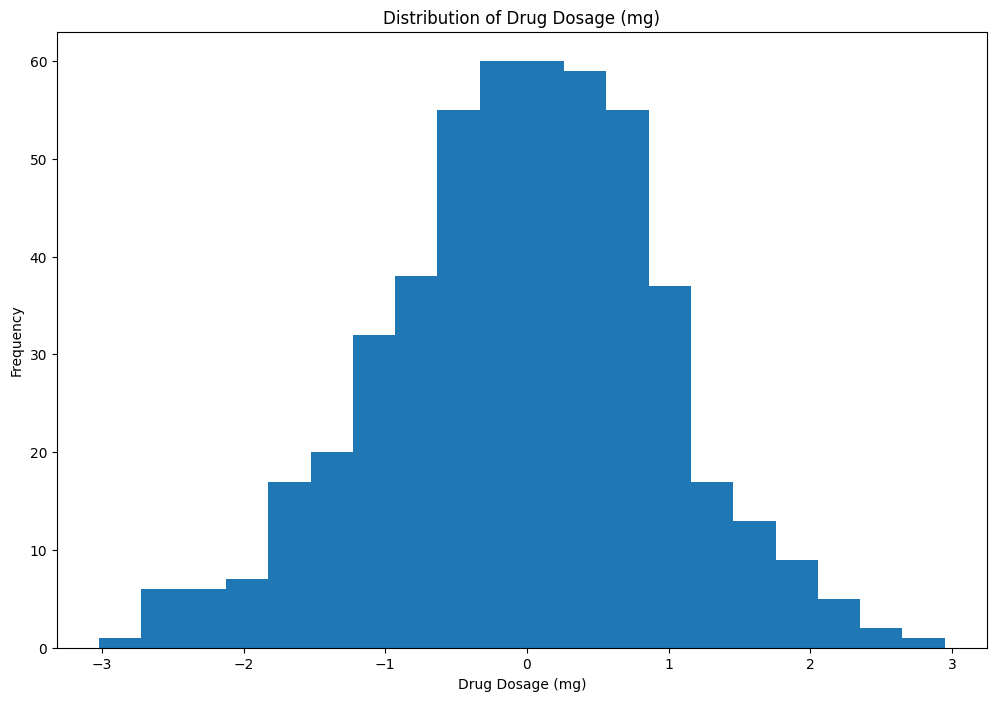

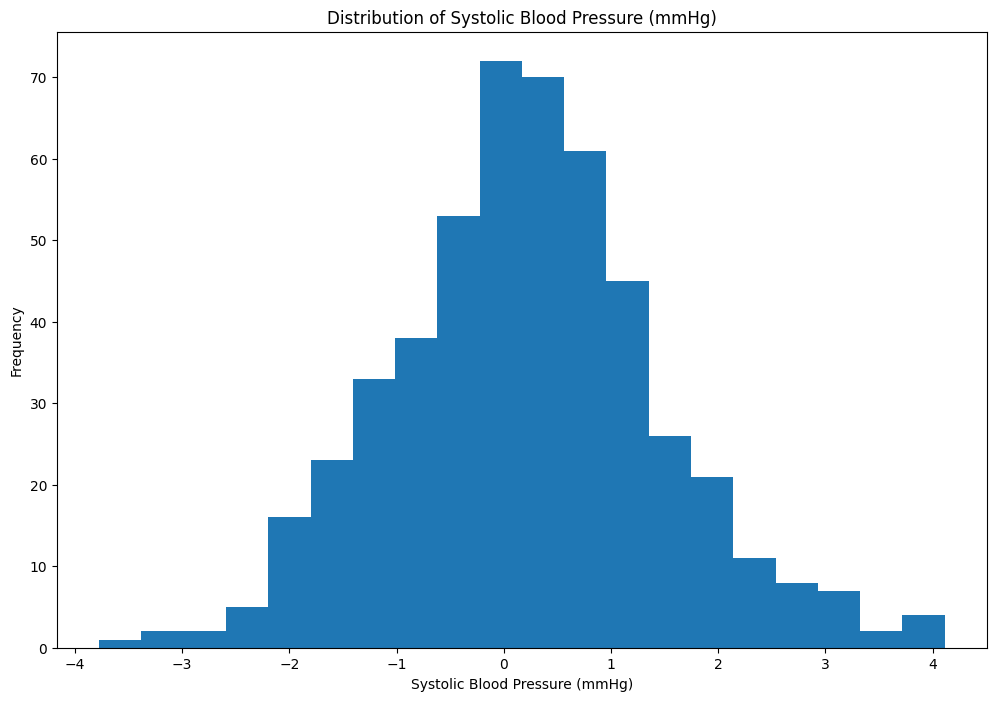

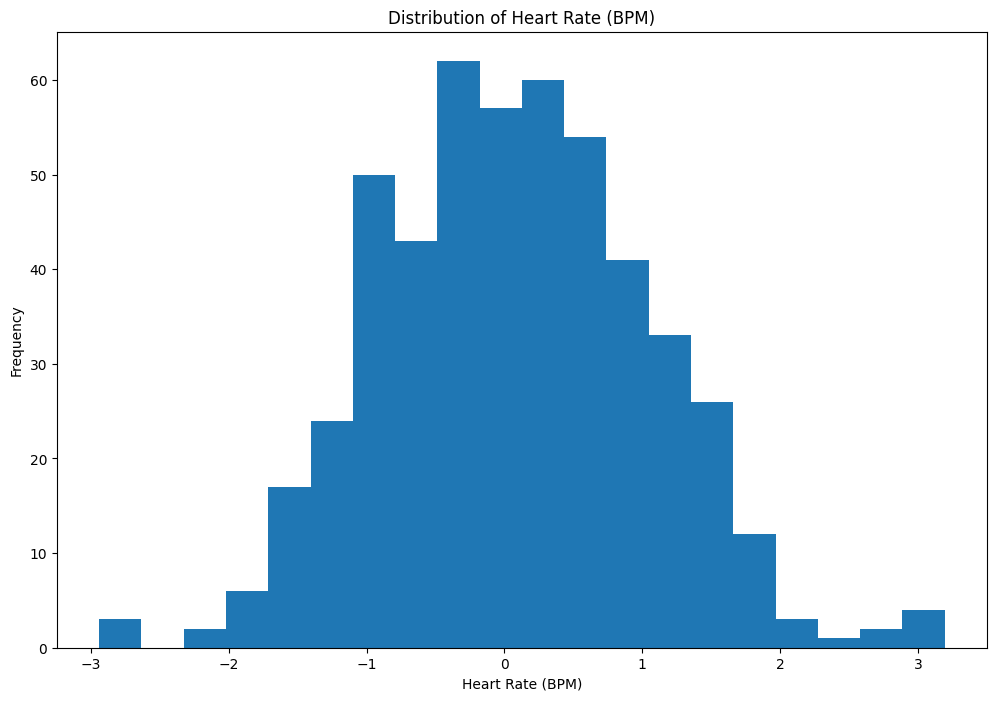

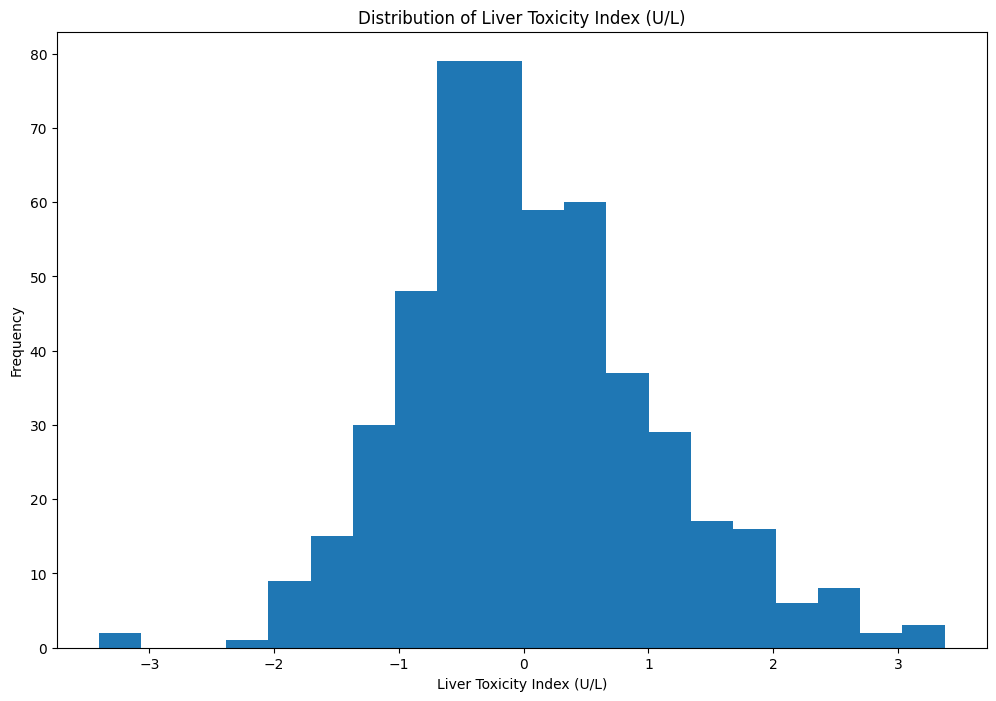

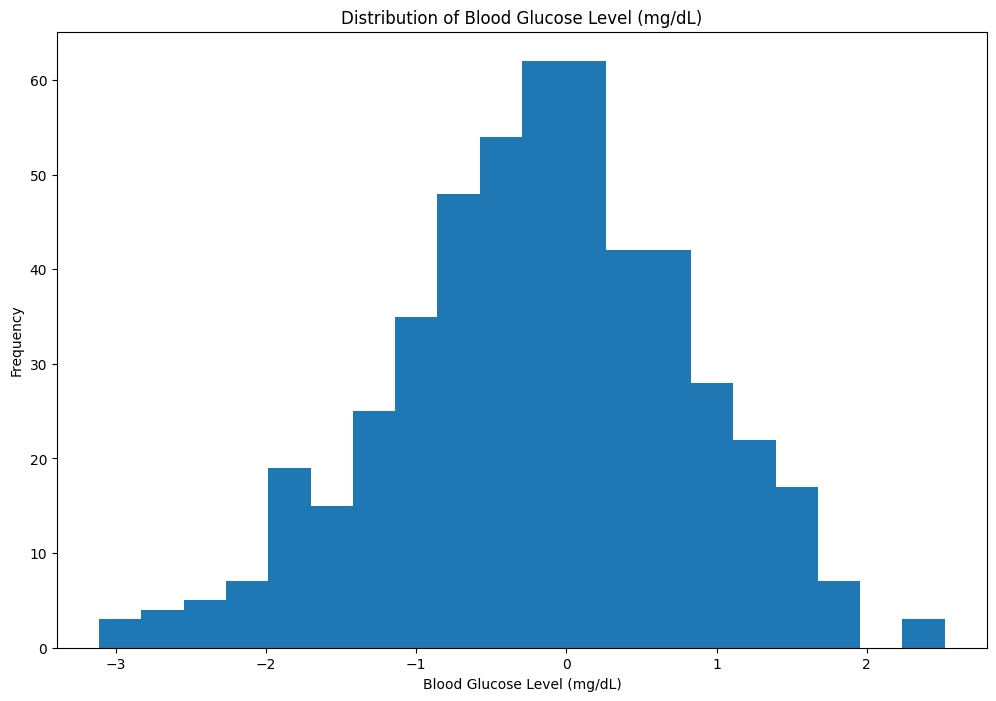

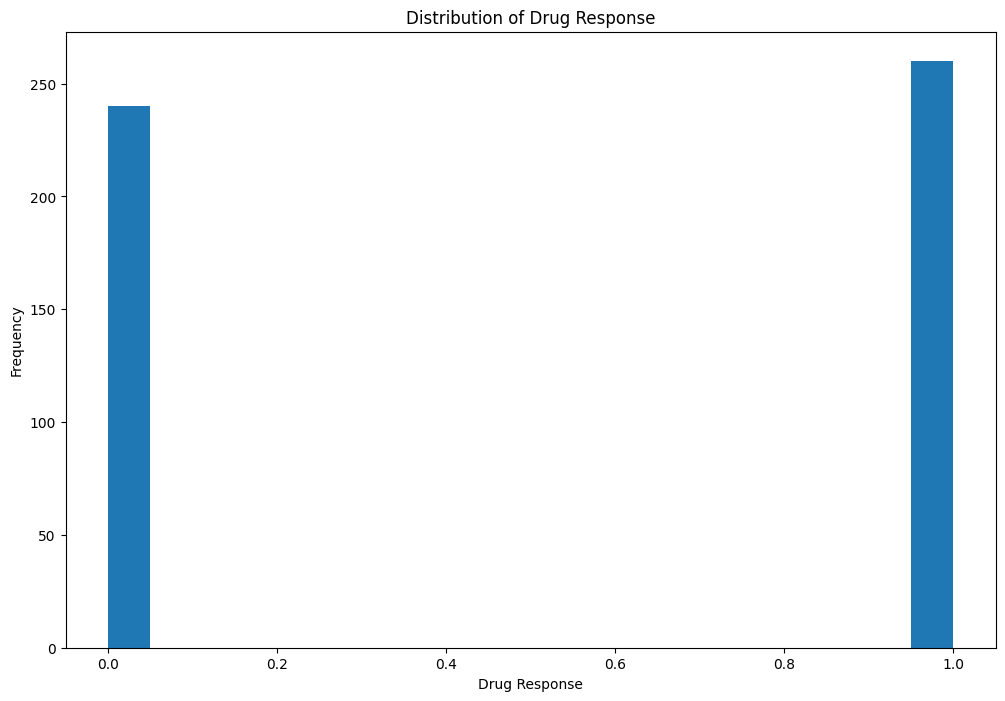

In [6]:
# understanding feature distribution

#histograms
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
  plt.figure(figsize=(12,8))
  plt.hist(df[col], bins = 20)
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'ylabe'

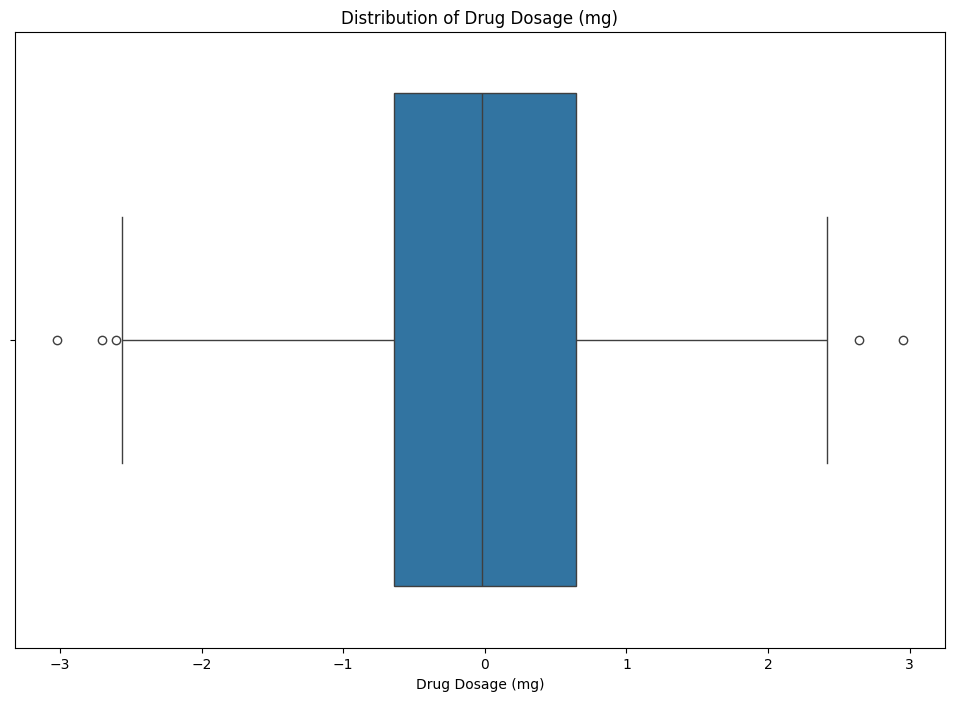

In [8]:
# box plot
for col in num_cols:
  plt.figure(figsize=(12,8))
  sns.boxplot(x=df[col])
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabe('Frequency')
  plt.show()

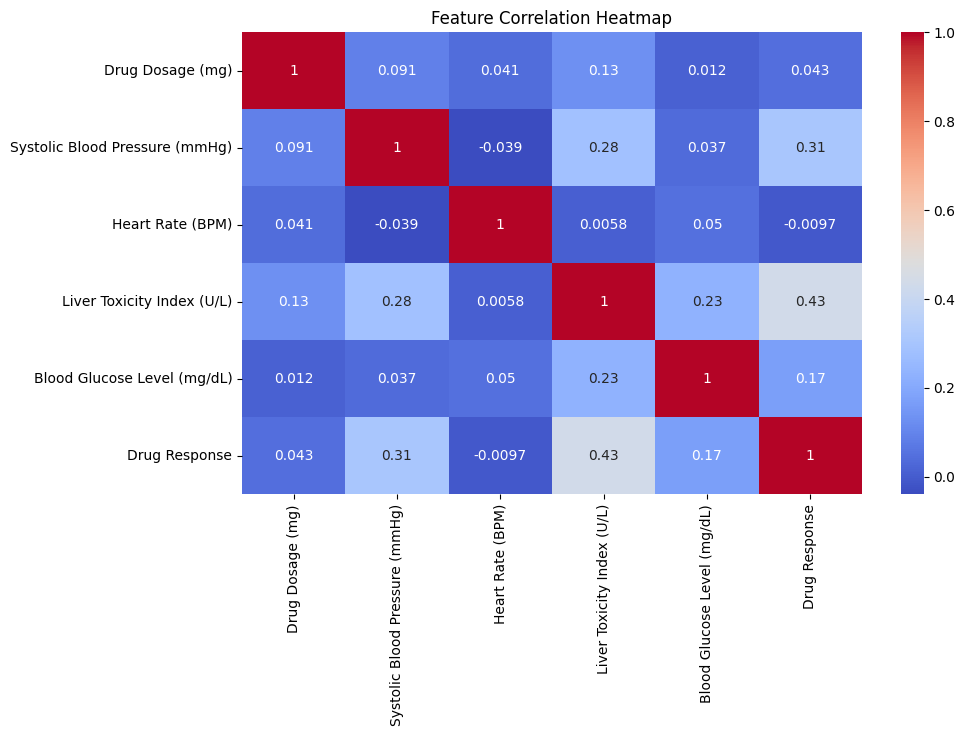

In [11]:
# Correlation Matrix
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

### 2. Data Preprocessing

In [13]:
# encoding categorical variables
cat_cols = df.select_dtypes(include=['object']).columns

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in cat_cols:
  df[col] = le.fit_transform(df[col])

df.head()

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
0,-0.128538,0.303280,-1.881849,0.258286,-0.792011,1
1,-1.846188,2.865142,-0.929511,2.866786,-0.719447,1
2,-1.252393,-1.541613,0.363632,-0.325370,0.191314,0
3,1.992515,-1.142779,-0.766657,0.975286,-0.823355,1
4,0.377100,0.538410,-0.029263,1.896015,-0.960130,1


In [14]:
# splitting datasets into training and testing data
from sklearn.model_selection import train_test_split

X = df.drop('Drug Response', axis=1)
y = df['Drug Response']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape, X_test.shape

((400, 5), (100, 5))

### 3. Data Visualization

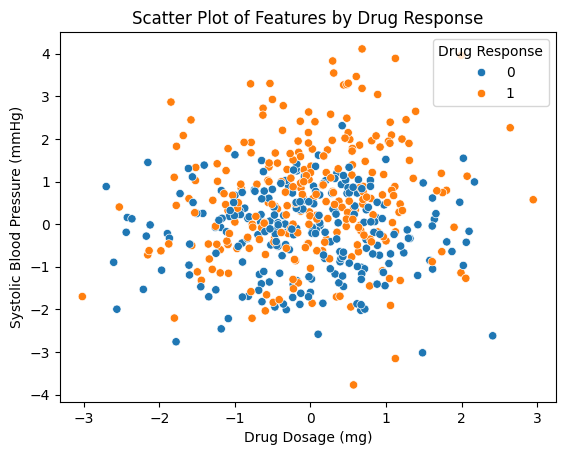

In [15]:
# scatter plot
sns.scatterplot(data = df, x=df.columns[0], y=df.columns[1], hue='Drug Response')
plt.title('Scatter Plot of Features by Drug Response')
plt.show()

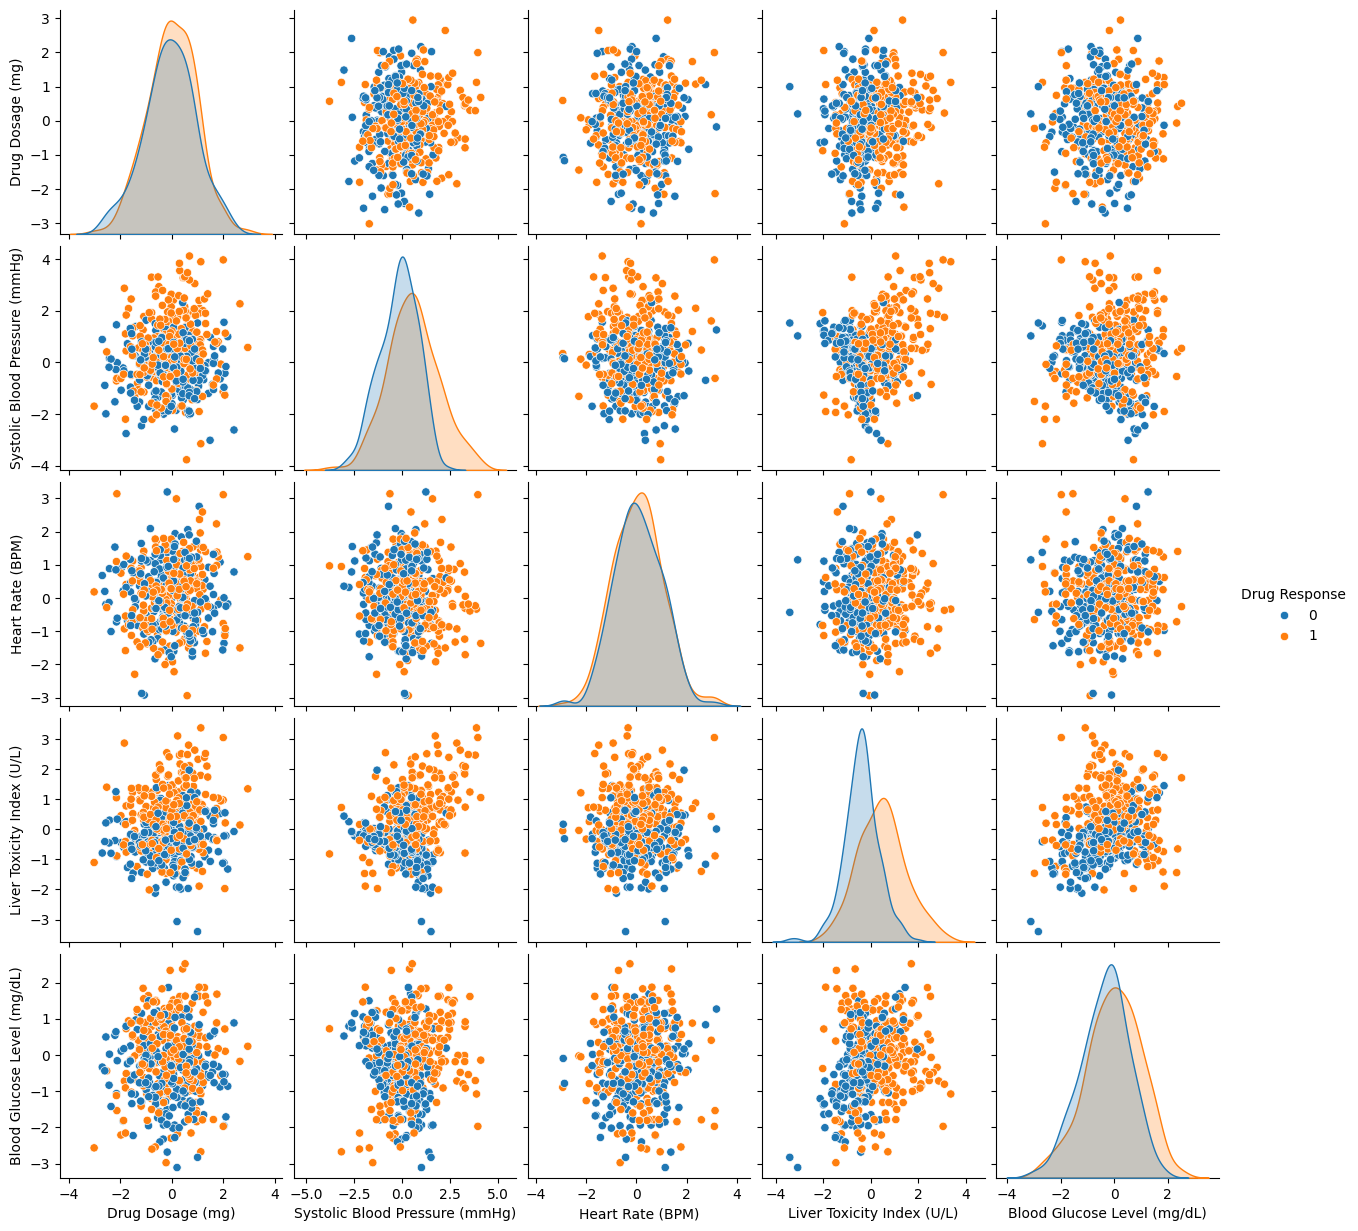

In [16]:
# Pair plots
sns.pairplot(df, hue='Drug Response', diag_kind='kde')
plt.show()

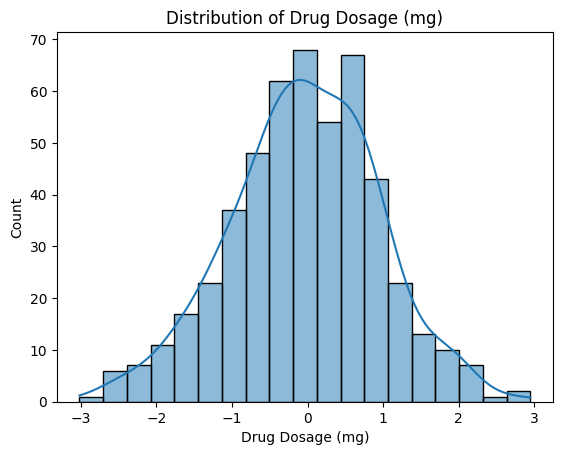

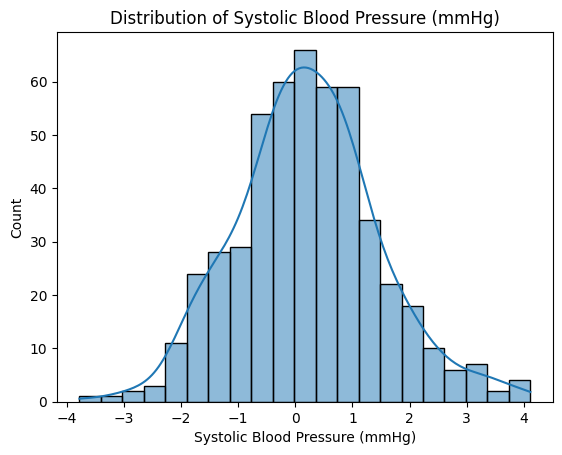

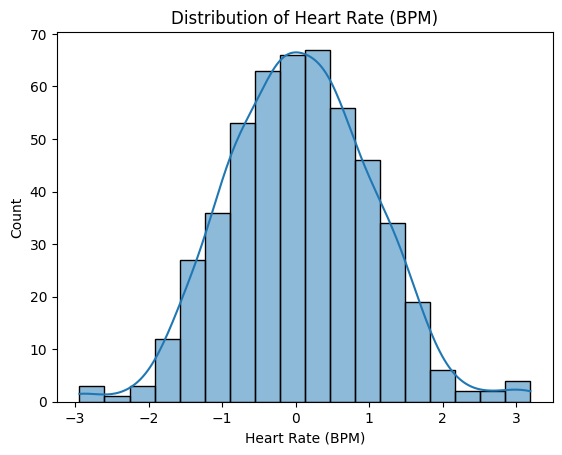

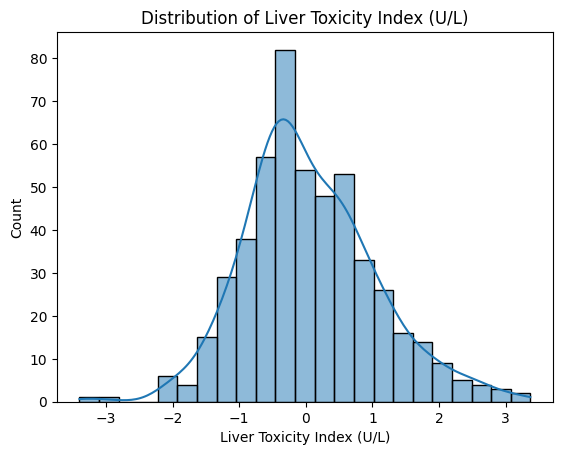

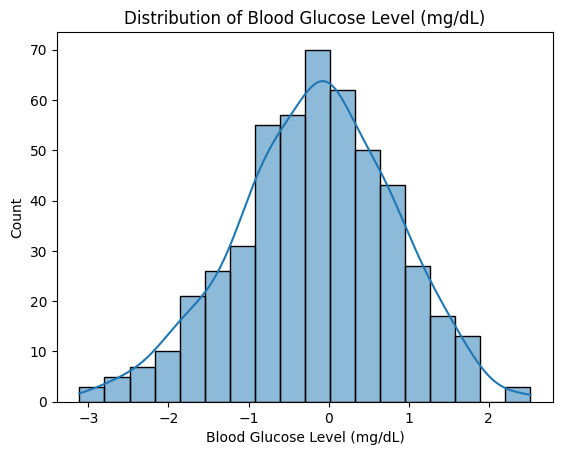

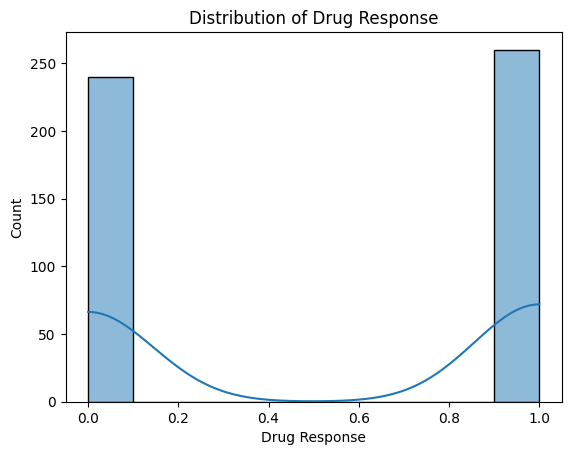

In [17]:
#feature distribution plots
for col in num_cols:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

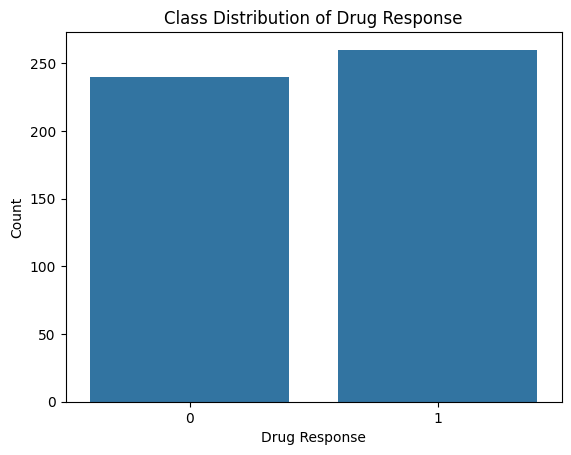

In [20]:
#visualizing class distribution
sns.countplot(x='Drug Response' ,data = df)
plt.title('Class Distribution of Drug Response')
plt.xlabel('Drug Response')
plt.ylabel('Count')
plt.show()

### 4. SVM Implementation

In [21]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)


In [42]:
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf', random_state=42)

svm_model.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [43]:
y_pred = svm_model.predict(X_test_scaled)
y_pred

array([1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

accuracy, precision, recall, f1

(0.72, 0.7608695652173914, 0.6730769230769231, 0.7142857142857143)

In [29]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.69      0.77      0.73        48\n           1       0.76      0.67      0.71        52\n\n    accuracy                           0.72       100\n   macro avg       0.72      0.72      0.72       100\nweighted avg       0.72      0.72      0.72       100\n'

### 5. Visualization of SVM Results

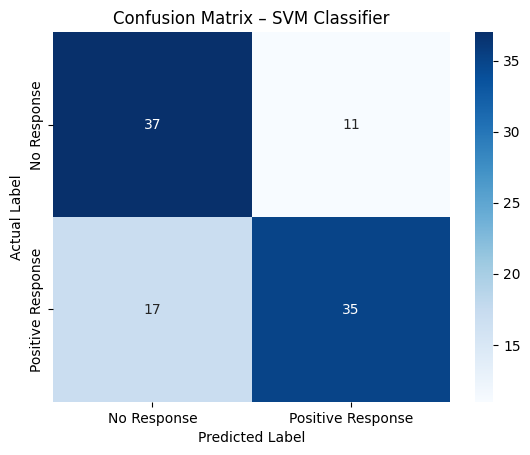

In [30]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Response", "Positive Response"],
            yticklabels=["No Response", "Positive Response"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix – SVM Classifier")
plt.show()

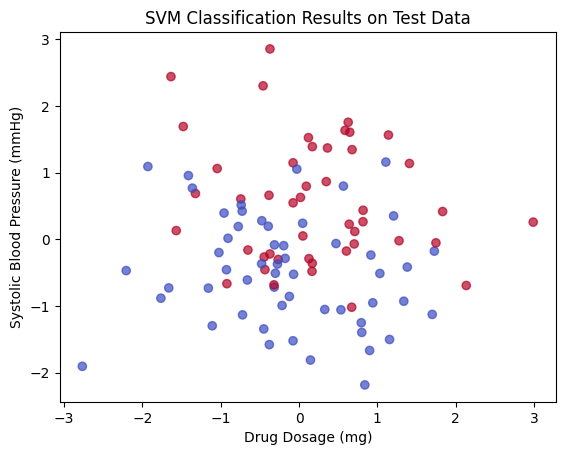

In [32]:
# visualization of svm using two features
feature_x = X_test_scaled[:, 0]
feature_y = X_test_scaled[:, 1]

plt.scatter(feature_x, feature_y, c=y_pred, cmap='coolwarm', alpha=0.7)
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.title("SVM Classification Results on Test Data")
plt.show()

### 6. Parameter Tuning and Optimization

In [41]:
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.1, 0.01]
}

grid = GridSearchCV(
    estimator=SVC(),
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1
)

grid.fit(X_train_scaled, y_train)

best_svm = grid.best_estimator_

In [45]:
grid.best_params_, grid.best_score_

({'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}, np.float64(0.7601872979459187))

In [44]:
y_pred_best = svm_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

accuracy, precision, recall, f1

(0.77, 0.7636363636363637, 0.8076923076923077, 0.7850467289719626)

### 7. Comparision and Analysis

In [46]:
# Comparison of SVM Performance with Different Kernels
kernels = ["linear", "poly", "rbf"]
results = {}

for k in kernels:
    svm = SVC(kernel=k, C=1, gamma="scale", random_state=42)
    svm.fit(X_train_scaled, y_train)
    y_pred = svm.predict(X_test_scaled)

    results[k] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    }

results

{'linear': {'Accuracy': 0.72, 'F1 Score': 0.7142857142857143},
 'poly': {'Accuracy': 0.71, 'F1 Score': 0.7128712871287128},
 'rbf': {'Accuracy': 0.77, 'F1 Score': 0.7850467289719626}}

* Linear - moderate performance, works well if data is linearly seperable

* Polynomial - Moderate-good performance, captures feature interactions but may overfit

* RBF - Best Performance, handles non-linear boundaries effectively.

RBF kernel usually performs best for biomedical datasets due to non-linear feature relationships.

Strengths of SVM:
* Performs well in high-dimensional spaces

* Effective for binary classification

* Robust to overfitting with proper regularization

* Works well when features show clear separation (as seen in scatter and pair plots)

Weakness of SVM:

* Sensitive to feature scaling (observed during preprocessing)

* Performance drops with highly overlapping classes

* Kernel selection and parameter tuning can be computationally expensive

* Less interpretable compared to linear models



Practical Implications of SVM in Real-World Classification:
1. In Healthcare / Drug Response Prediction:  
   * Helps predict whether a patient will respond to a drug

   * Enables early decision-making in clinical trials

   * Reduces cost and time in drug development


* SVM with RBF kernel outperforms linear and polynomial kernels for non-linear data, making it well-suited for complex real-world classification tasks like drug response prediction.